### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
card = pd.read_csv('creditcard.csv')

In [3]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
card.shape

(284807, 31)

In [7]:
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
card_dup = card.copy()
card_dup.drop_duplicates(subset=None,inplace = True)

In [9]:
card.shape

(284807, 31)

In [10]:
card_dup.shape

(283726, 31)

In [11]:
del card_dup

In [34]:
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
card.Class.value_counts() #492 fraud

0    284315
1       492
Name: Class, dtype: int64

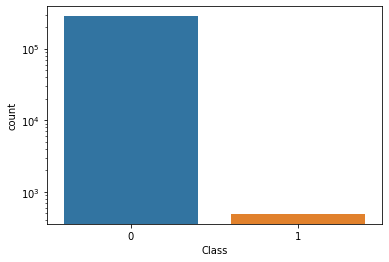

In [13]:
ax=sns.countplot(x='Class',data=card);
ax.set_yscale('log')

In [14]:
estimators=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X1 = card[estimators]
y = card['Class']

In [15]:
col=X1.columns[:-1]
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [16]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13


In [17]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284776
Method:                           MLE   Df Model:                           30
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6922
Time:                        21:05:40   Log-Likelihood:                -1114.8
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3917      0.249    -33.652      0.000      -8.880      -7.903
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0.042      2.264      0.024       0.013       0.179
V2             0.0094      0.058      0.161      0.872      -0.104       0.123
V3            -0.0079      0.053     -0.149      0.881      -0.112       0.096
V4             0.6986      0.074      9.454      0.000       0.554       0.843
V5             0.1295      0.067      1.944      0.052      -0.001       0.260
V6            -0.1198      0.074     -1.626      0.104      -0.264       0.025
V7            -0.0969      0.067     -1.453      0.146      -0.228       0.034
V8            -0.1739      0.030     -5.711      0.000      -0.234      -0.114
V9            -0.2843      0.111     -2.561      0.010      -0.502      -0.067
V10           -0.8176      0.097     -8.432      0.000      -1.008      -0.628
V11           -0.0621      0.081     -0.762      0.446      -0.222       0.098
V12            0.0909      0.087      1.045      0.296      -0.080       0.261
V13           -0.3312      0.082     -4.058      0.000      -0.491      -0.171
V14           -0.5571      0.062     -8.949      0.000      -0.679      -0.435
V15           -0.1141      0.086     -1.330      0.183      -0.282       0.054
V16           -0.1908      0.125     -1.526      0.127      -0.436       0.054
V17           -0.0216      0.070     -0.309      0.757      -0.159       0.116
V18           -0.0131      0.129     -0.102      0.919      -0.266       0.240
V19            0.0963      0.097      0.993      0.321      -0.094       0.286
V20           -0.4582      0.082     -5.607      0.000      -0.618      -0.298
V21            0.3898      0.060      6.494      0.000       0.272       0.507
V22            0.6297      0.134      4.707      0.000       0.367       0.892
V23           -0.0951      0.058     -1.629      0.103      -0.209       0.019
V24            0.1289      0.147      0.874      0.382      -0.160       0.418
V25           -0.0761      0.131     -0.582      0.560      -0.332       0.180
V26            0.0195      0.190      0.103      0.918      -0.352       0.392
V27           -0.8188      0.122     -6.686      0.000      -1.059      -0.579
V28           -0.2937      0.088     -3.332      0.001      -0.467      -0.121
Amount         0.0009      0.000      2.449      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:

def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,card.Class,col)

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284782
Method:                           MLE   Df Model:                           24
Date:                Fri, 21 May 2021   Pseudo R-squ.:                 0.06233
Time:                        21:05:53   Log-Likelihood:                -3395.5
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                 1.919e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -86.049      0.000      -0.000      -0.000
V1             0.8905      0.028     31.948      0.000       0.836       0.945
V2            -0.4531      0.023    -19.454      0.000      -0.499      -0.407
V3            -1.6040      0.032    -49.454      0.000      -1.668      -1.540
V4             0.1445      0.025      5.668      0.000       0.095       0.195
V5             0.4081      0.024     17.097      0.000       0.361       0.455
V6            -0.3890      0.025    -15.311      0.000      -0.439      -0.339
V7             0.0992      0.028      3.582      0.000       0.045       0.154
V8            -0.3893      0.023    -17.118      0.000      -0.434      -0.345
V9            -0.4601      0.043    -10.675      0.000      -0.545      -0.376
V10           -0.3799      0.051     -7.436      0.000      -0.480      -0.280
V11           -0.6133      0.034    -17.969      0.000      -0.680      -0.546
V12            0.1263      0.034      3.678      0.000       0.059       0.194
V13           -0.4513      0.035    -13.070      0.000      -0.519      -0.384
V14           -0.6980      0.032    -22.083      0.000      -0.760      -0.636
V15           -1.0426      0.041    -25.255      0.000      -1.123      -0.962
V16           -0.2386      0.042     -5.747      0.000      -0.320      -0.157
V17           -0.7041      0.033    -21.507      0.000      -0.768      -0.640
V20           -0.6758      0.050    -13.576      0.000      -0.773      -0.578
V21            0.5683      0.041     13.871      0.000       0.488       0.649
V22            1.3555      0.062     21.869      0.000       1.234       1.477
V23            0.2932      0.054      5.408      0.000       0.187       0.399
V25           -1.9974      0.072    -27.593      0.000      -2.139      -1.855
V26            0.3076      0.072      4.281      0.000       0.167       0.448
V27           -0.7474      0.088     -8.483      0.000      -0.920      -0.575
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

      CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Time      0.999874       0.999880    0.999877     0.0
V1        2.306871       2.573219    2.436408     0.0
V2        0.607258       0.665317    0.635624     0.0
V3        0.188703       0.214287    0.201088     0.0
V4        1.099162       1.214710    1.155493     0.0
V5        1.435225       1.575997    1.503965     0.0
V6        0.644844       0.712365    0.677764     0.0
V7        1.045965       1.165922    1.104316     0.0
V8        0.647980       0.708401    0.677517     0.0
V9        0.580064       0.686844    0.631200     0.0
V10       0.618778       0.755967    0.683941     0.0
V11       0.506517       0.579026    0.541560     0.0
V12       1.060766       1.213565    1.134596     0.0
V13       0.595111       0.681372    0.636782     0.0
V14       0.467669       0.529359    0.497559     0.0
V15       0.325146       0.382259    0.352548     0.0
V16       0.726179       0.854508    0.787735     0.0
V17       0.463798       0.5

In [21]:
new_features=card[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,stratify=y)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.68      0.73       148

    accuracy                           1.00     85443
   macro avg       0.89      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443



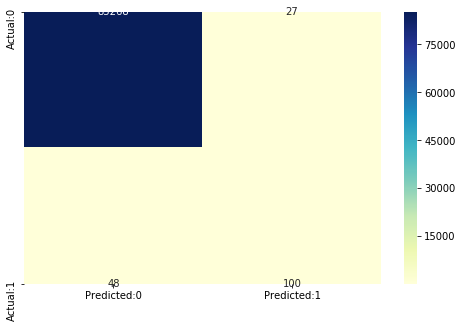

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [25]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [26]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9991222218320986 
 The Missclassification = 1-Accuracy =                   0.0008777781679013552 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.6756756756756757 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9996834515505012 
 Positive Predictive value = TP/(TP+FP) =                0.7874015748031497 
 Negative predictive Value = TN/(TN+FN) =                0.9994373857189741 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2134.509509509504 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3244270211948591


In [27]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999640,3.597437e-04
1,0.999062,9.383426e-04
2,0.999330,6.700988e-04
3,1.000000,5.726034e-08
4,0.999476,5.242659e-04


In [28]:
from sklearn.preprocessing import binarize
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 85295]
 [    0   148]] 
 with 148 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.1 threshold the Confusion Matrix is  
 [[84732   563]
 [   43   105]] 
 with 84837 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.7094594594594594 Specificity:  0.9933993786271177 



With 0.2 threshold the Confusion Matrix is  
 [[85131   164]
 [   44   104]] 
 with 85235 correct predictions and 44 Type II errors( False Negatives) 

 Sensitivity:  0.7027027027027027 Specificity:  0.998077261269711 



With 0.3 threshold the Confusion Matrix is  
 [[85233    62]
 [   47   101]] 
 with 85334 correct predictions and 47 Type II errors( False Negatives) 

 Sensitivity:  0.6824324324324325 Specificity:  0.9992731109678176 



With 0.4 threshold the Confusion Matrix is  
 [[85258    37]
 [   48   100]] 
 with 85358 correct predictions and 48 Type II errors( False Neg

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9184357785301569

All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the fraud Prediction.

In [30]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 

rfc.fit(x_train,y_train)
y_pred_rf=rfc.predict(x_test)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.78      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



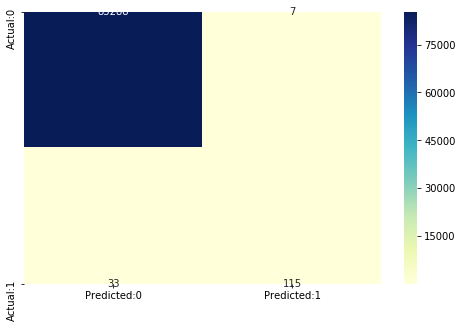

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [32]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [33]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9995318516437859 
 The Missclassification = 1-Accuracy =                   0.0004681483562141153 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.777027027027027 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9999179318834632 
 Positive Predictive value = TP/(TP+FP) =                0.9426229508196722 
 Negative predictive Value = TN/(TN+FN) =                0.9996132253489762 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  9468.074324319081 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.22299127344678893
